In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear DataFrame
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df["species"] = df["target"].map({i: name for i, name in enumerate(target_names)})

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Crear DataFrame con varianza explicada
variance_df = pd.DataFrame({
    "Component": [f"PC{i+1}" for i in range(len(pca_full.explained_variance_ratio_))],
    "Variance": pca_full.explained_variance_ratio_,
    "Cummulative Variance": np.cumsum(pca_full.explained_variance_ratio_)
})

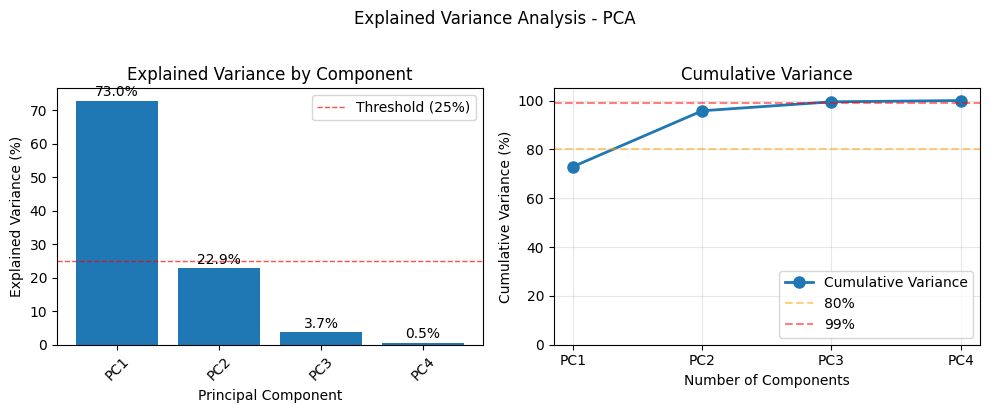

In [6]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart (Variance)
bars = ax1.bar(variance_df["Component"], variance_df["Variance"] * 100)
ax1.axhline(y=25, color="red", linestyle="--", alpha=0.7, linewidth=1, label="Threshold (25%)")
ax1.set_title("Explained Variance by Component")
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance (%)")
ax1.tick_params(axis="x", rotation=45)
ax1.legend()

# Add values above bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5, f"{height:.1f}%", ha="center", va="bottom")

# Line chart (Cumulative Variance)
ax2.plot(variance_df["Component"], variance_df["Cummulative Variance"] * 100,
         marker="o", linestyle="-", linewidth=2, markersize=8, label="Cumulative Variance")

# Mark important thresholds
thresholds = [80, 99]
colors = ["orange", "red"]

for i, threshold in enumerate(thresholds):
    ax2.axhline(y=threshold, color=colors[i], linestyle="--", alpha=0.5, label=f"{threshold}%")

ax2.set_title("Cumulative Variance")
ax2.set_xlabel("Number of Components")
ax2.set_ylabel("Cumulative Variance (%)")
ax2.set_ylim(0, 105)
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.suptitle("Explained Variance Analysis - PCA", y=1.02)
plt.tight_layout()
plt.savefig("./figures/pca_variance_analysis.png", dpi=300, bbox_inches="tight")
plt.show()


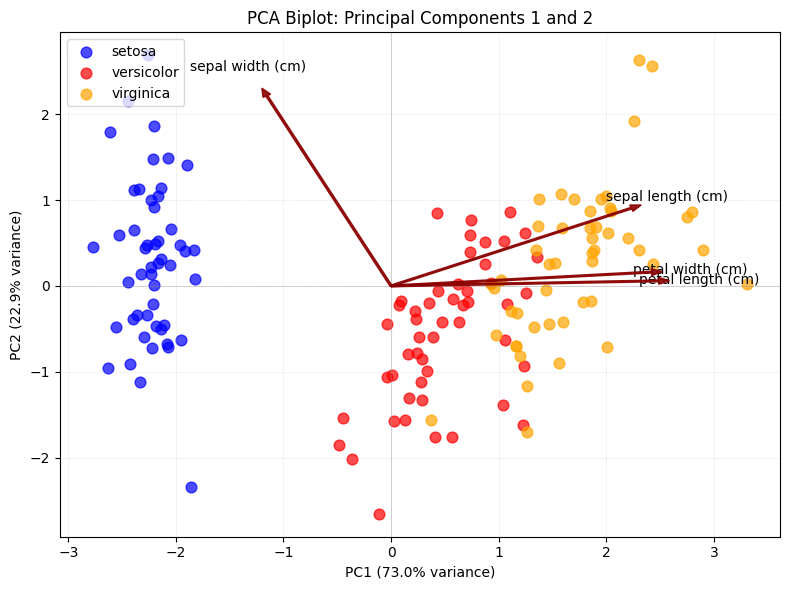

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# --- PCA 2D ---
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

fig2, ax2 = plt.subplots(figsize=(8, 6))
colors = ['blue', 'red', 'orange']

# Scatter plot by species
for i, species in enumerate(target_names):
    mask = df['species'] == species
    scatter = ax2.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], color=colors[i], alpha=0.7, s=60, label=species)

# Compute variable loadings
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)

# Draw vectors for original variables
vector_scale = 2.5
for i, feature in enumerate(feature_names):
    ax2.arrow(0, 0, loadings[i, 0] * vector_scale, loadings[i, 1] * vector_scale, 
              head_width=0.08, head_length=0.1, fc='darkred', ec='darkred', alpha=0.9, width=0.02, zorder=4)
    
    # Label with slight offset
    label_x = loadings[i, 0] * vector_scale * 1.15
    label_y = loadings[i, 1] * vector_scale * 1.15
    ax2.text(label_x, label_y, feature, color='black', ha='center', va='center')

# Reference lines
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.8)
ax2.axvline(x=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.8)

# Axis labels with explained variance
var_pc1 = pca_2d.explained_variance_ratio_[0] * 100
var_pc2 = pca_2d.explained_variance_ratio_[1] * 100
ax2.set_xlabel(f'PC1 ({var_pc1:.1f}% variance)')
ax2.set_ylabel(f'PC2 ({var_pc2:.1f}% variance)')
ax2.set_title('PCA Biplot: Principal Components 1 and 2')

# Species legend
ax2.legend(loc='upper left')

# Grid
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('./figures/pca_biplot.png', dpi=300, bbox_inches='tight')
plt.show()
